# Projet ML

# 1 Développement d'un perceptron

## On importe les librairies nécessaires

In [82]:
import numpy as np
from numpy.core.defchararray import isnumeric
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

## 1.1 Mise en place d'un perceptron simple

* ## Créer une fonction

In [83]:
def perceptron_simple(x: list, w: list, active: int):
    """
    Perceptron Simple
    va évaluer la sortie d'un perceptron simple (1 neurone) pour une entrée élément de R2.

    :param w: contient les poids synaptiques du neurone sur 3 lignes. La 1ère correspond au seuil
    :type w: list
    :param x: contient l'entrée du réseau de neurones sur 2 lignes
    :type x: list
    :param active: indique la fonction d'activation utilisée
    :type active: int
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    # w[0] correspond au seuil
    # on multiplie les poids avec les entrés correspondantes
    y = w[1]*x[0] + w[2]*x[1] + w[0]*1
    
    if active == 0:
        y = np.sign(y)
    else:
        y = np.tanh(y)
    
    return y

* ## Tester votre perceptron avec l'exemple du OU logique (phi(x) = sign(x))

In [26]:
x = [0,0]
w = [-0.5,0,1]
y = perceptron_simple(x.copy(), w, active=1)
print(y)

-0.46211715726000974


* ## Afficher dans le cadre de l'exemple du OU logique sur la même figure les differents élements de l'ensemble d'apprentissage et la droite séparatrice associée aux poids du neurone sur la même figure

(-0.5, 1.5, -0.5, 1.5)

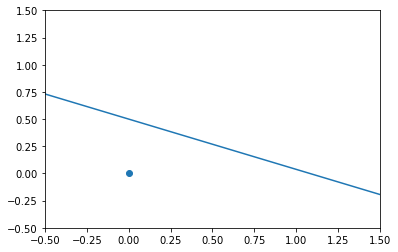

In [8]:
a = range(-10,10)
b = a*y - w[0]
plt.plot(a, b)
plt.scatter(x[0], x[1])
plt.axis([-0.5, 1.5, -0.5, 1.5])


#### Les points en dessous de la ligne auront un résultat égal à « -1 », et « 1 » pour les points au dessus

## 1.2.1 Programmation apprentissage Widrow-hoff

* ## Créer une fonction

In [84]:
def perceptron_simple(x: list, w: list, prime: int):
    """
    Perceptron Simple
    va évaluer la sortie d'un perceptron simple (1 neurone) pour une entrée élément de R2.

    :param w: contient les poids synaptiques du neurone sur 3 lignes. La 1ère correspond au seuil
    :type w: list
    :param x: contient l'entrée du réseau de neurones sur 3 lignes. La 1ère correspond à 1
    :type x: list
    :param prime: indique si la fonction d'activation est dérivée ou non
    :type prime: int
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    # w[0] correspond au seuil
    # on multiplie les poids avec les entrés correspondantes
    y = w[1]*x[1] + w[2]*x[2] + w[0]*x[0]
    
    if prime == 0:
        y = np.tanh(y)
    else:
        y = (1 - np.tanh(y)**2)
    
    return y

def apprentissage_widrow(x: np.array, yd: np.array, epoch: int, batch_size: int):
    """
    Apprentissage Widrow
    va apprendre en utilisant la règle de descente du gradient.

    :param x: contient l'entrée du réseau de neurones sur 3 lignes (la 1ère correspond à 1) et n colonnes
    :type x: np.array
    :param yd: indique la réponse désirée pour chaque élément sur 1 ligne et n colonnes de valeurs +1 ou -1
    :type yd: np.array
    :param epoch: le nombre d'itérations sur l'ensemble d'apprentissage
    :type epoch: int
    :param batch_size: le nombre d'individus de l'ensemble d'apprentissage traités avant mise à jour des poids
    :type batch_size: int
    :return w: contient les poids synaptiques du neurone après apprentissage sur 3 lignes. La 1ère correspond au seuil
    :rtype w: list
    :return loss: l'ensemble des erreurs cumulées calculées
    :rtype loss: list
    """
    
    loss = list()
    w = [random.random(), random.random(), random.random()]
    alpha = 0.9
    for e in tqdm(range(epoch)):
        for i in range(len(x[0])):
            y = perceptron_simple(x[:,i], w, prime=0)
                        
            erreur = y - yd[i]
            loss.append(erreur**2)
            
            for j in range(len(w)):
                S_erreur = erreur * perceptron_simple(x[:,i], w, prime=1)
                w[j] = w[j] - alpha * S_erreur * x[j][i]

        if erreur==0:
            break
    
    return w, loss

def show_resultats_perceptron(x: np.array, yd: np.array, w: list, loss: list):
    """
    Show Resultats Perceptron
    va afficher la courbe d'erreur, le nuage de point des prédiction et la matrice de confusion

    :param x: contient l'entrée du réseau de neurones sur 3 lignes (la 1ère correspond à 1) et n colonnes
    :type x: np.array
    :param yd: indique la réponse désirée pour chaque élément sur 1 ligne et n colonnes de valeurs +1 ou -1
    :type yd: np.array
    :param w: contient les poids synaptiques du neurone après apprentissage sur 3 lignes. La 1ère correspond au seuil
    :type w: list
    :param loss: l'ensemble des erreurs cumulées calculées
    :type loss: list
    """
    
    plt.plot(loss)
    plt.show()
    
    y_pred = list()
    seuil = 0
    for i in range(50):
        if perceptron_simple(x[:,i], w, prime=0) < seuil:
            y_pred.append(-1)
        else:
            y_pred.append(1)

    plt.scatter(range(len(y_pred)), y_pred)
    plt.plot(range(len(y_pred)),[seuil]*len(y_pred))
    plt.show()

    print(confusion_matrix(yd, y_pred))


* ## Charger des données p2 d1.txt

In [10]:
# on charge les données
Data = np.loadtxt("Data/p2_d1.txt")
# on concatène les données avec un vecteur de 50 1 et avec un vecteur de 25 -1 et 25 1 pour les classes
Data_full = np.concatenate((np.array([[1]*50]),Data,np.array([[-1]*25+[1]*25])))
# on mélange le dataset
Data_mix = Data_full[:, np.random.permutation(Data_full.shape[1])]
# on extrait l'entré
x = Data_mix[:-1]
# on extrait les classes à prédire
yd = Data_mix[-1]

* ## Appliquer votre algorithme d'apprentissage. Afficher l'évolution de l'erreur. Vérifier que la frontière est correcte

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 408.16it/s]


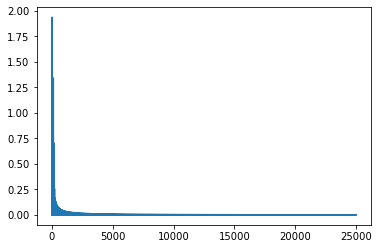

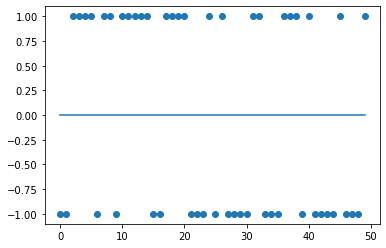

[[25  0]
 [ 0 25]]


In [11]:
epoch = 500
batch_size = 10
w, loss = apprentissage_widrow(x, yd, epoch, batch_size)
show_resultats_perceptron(x, yd, w, loss)

* On voit bien que la courbe d'erreur est de plus en plus faible et converge vers 0
* Les prédictions sont excellentes
* La matrice de confusion affiche un resultat parfait


* ## Charger des données p2 d2.txt

In [29]:
# on charge les données
Data = np.loadtxt("Data/p2_d2.txt")
# on concatène les données avec un vecteur de 50 1 et avec un vecteur de 25 -1 et 25 1 pour les classes
Data_full = np.concatenate((np.array([[1]*50]),Data,np.array([[-1]*25+[1]*25])))
# on mélange le dataset
Data_mix = Data_full[:, np.random.permutation(Data_full.shape[1])]
# on extrait l'entré
x = Data_mix[:-1]
# on extrait les classes à prédire
yd = Data_mix[-1]

* ## Appliquer votre algorithme d'apprentissage de Widrow-Hoff. Comparer avec les premières données et conclure.

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 359.49it/s]


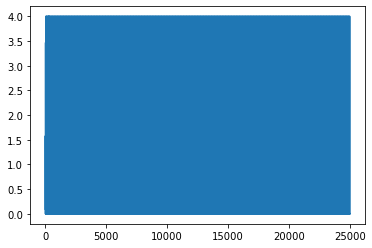

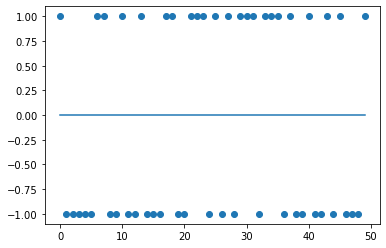

[[25  0]
 [ 2 23]]


In [30]:
epoch = 500
batch_size = 10
w, loss = apprentissage_widrow(x, yd, epoch, batch_size)
show_resultats_perceptron(x, yd, w, loss)

* On voit que la courbe d'erreur fait des va et vient 
* La matrice de confusion affiche pourtant un très bon resultat


-> Les données n'ont sûrement pas assez de liens avec leurs classe

## 1.3.1 Mise en place d'un perceptron multicouche

* ## Créer une fonction

In [85]:
def fonction_activate(u: int):
    """
    Fonction activate
    va recalculer la sortie selon la fonction d'activation

    :param u: un scalaire correspondant à la sortie du neurone
    :type u: int
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    y = 1.0/(1 + np.exp(-u))
    
    return y

def multiperceptron(x,w1,w2):
    """
    Multiperceptron
    va calcul la sortie d'un perceptron multicouches à 1 neurone sur la couche de sortie et 2 neurones sur la couche cachée

    :param x: contient l'entrée du réseau de neurones sur 2 lignes
    :type x: list
    :param w1: contient les poids synaptiques du neurone de la couche cachée sur 3 lignes (la 1ère correspond au seuil) et 2 colonnes pour 2 neurones
    :type w1: np.array
    :param w2: contient les poids synaptiques du neurone de la couche de sortie sur 3 lignes(la 1ère correspond au seuil) et 1 colonne pour 1 neurone
    :type w2: np.array
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    x = np.append([1], x).reshape(3,1)

    u1 = np.dot(w1[:,0].reshape(1,3), x)
    y1 = fonction_activate(u1[0,0])

    u2 = np.dot(w1[:,1].reshape(1,3), x)
    y2 = fonction_activate(u2[0,0])

    xf = np.append([1], [y1, y2]).reshape(3,1)

    uf = np.dot(w2.reshape(1,3), xf)
    yf = fonction_activate(uf[0,0])

    return yf

* ## Tester votre perceptron multicouches avec l'exemple ci-dessous avec x = [1,1]

In [13]:
w1 = np.array([[-0.5,0.5],
               [2,1],
               [-1,0.5]])

w2 = np.array([[2],
               [-1],
               [1]])

x = [1,1]

y = multiperceptron(x, w1, w2)
print(y)

0.9053673095402572


* ## Comparer le resultat "informatique" avec la sortie attendue calculee sur "le papier".

### Sur le papier :
#### Couche cachée :
* ##### 1er neurone : -0.5 x 1 + 2 x 1 + -1 x 1 = 0.5
-> donc 1/(1 + e^(-0.5)) = 0.62
* ##### 2e neurone : 0.5 x 1 + 1 x 1 + 0.5 x 1 = 2
-> donc 1/(1 + e^(-2)) = 0.88

#### Couche de sortie :
* ##### 1er neurone : 2 x 1 + -1 x 0.62 + 1 x 0.88 = 2.26
-> donc 1/(1 + e^(-2.26)) = 0.91

#### Ainsi les resultats sont conformes entre "informatique" et "papier"


## 1.3.2 \*Programmation apprentissage multicouches\*

* ## Créer une fonction

In [86]:
def fonction_activate(u: int):
    """
    Fonction activate
    va recalculer la sortie selon la fonction d'activation

    :param u: un scalaire correspondant à la sortie du neurone
    :type u: int
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    y = 1.0/(1 + np.exp(-u))
    
    return y

def fonction_activate_deriv(u: int):
    """
    Fonction Activate Derivé
    va recalculer la sortie selon la fonction d'activation

    :param u: un scalaire correspondant à la sortie du neurone
    :type u: int
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """

    y = fonction_activate(u) * (1 - fonction_activate(u))
    
    return y

def multiperceptron_widrow(x: np.array, yd: np.array, nb_neurone: int, epoch: int, batch_size: int):
    """
    Multiperceptron Widrow
    va calcul la sortie d'un perceptron multicouches à 1 neurone sur la couche de sortie et un nombre neurones sur la couche cachée rentré en paramètre

    :param x: contient l'entrée du réseau de neurones sur 3 lignes (la 1ère correspond à 1) et n colonnes
    :type x: np.array
    :param yd: indique la réponse désirée pour chaque élément sur 1 ligne et n colonnes de valeurs +1 ou -1
    :type yd: np.array
    :param nb_neurone: le nombre de neurone dans la couche cachée
    :type nb_neurone: int
    :param epoch: le nombre d'itérations sur l'ensemble d'apprentissage
    :type epoch: int
    :param batch_size: le nombre d'individus de l'ensemble d'apprentissage traités avant mise à jour des poids
    :type batch_size: int
    :return w1: contient les poids synaptiques du neurone de la couche cachée
    :rtype w1: np.array
    :return w2: contient les poids synaptiques du neurone de la couche de sortie
    :rtype w2: np.array
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    alpha = 0.5  

    # nombre de poids
    nb_ligne_w = len(x[0])
    # nombre de neuronne
    nb_colonne_w = nb_neurone

    w1 = np.random.uniform(-1, 1, (nb_ligne_w, nb_colonne_w))
    w2 = np.random.uniform(-1, 1, nb_colonne_w + 1)

    nb_ligne_x = len(x[:,0])
    nb_colonne_x = len(x[0])

    loss = list()
    for e in tqdm(range(epoch)):
        for i in range(nb_ligne_x):
            u_w1 = np.zeros(nb_colonne_w)
            y_w1 = np.zeros(nb_colonne_w)
            y_prime_w1 = np.zeros(nb_colonne_w)
            for j in range(nb_colonne_w):
                u_w1[j] = np.dot(x[i,:], w1[:, j])
                y_w1[j] = fonction_activate(u_w1[j])
                y_prime_w1[j] = fonction_activate_deriv(u_w1[j])
                
            y_w1 = np.append([1], y_w1)
            y_prime_w1 = np.append([1], y_prime_w1)

            u_w2 = np.dot(w2, y_w1.reshape(nb_colonne_w + 1,1))
            y_w2 = fonction_activate(u_w2)
            
            error = y_w2 - yd[i]
            loss.append(error**2)
            
            for j in range(nb_colonne_w):
                S_error = error * fonction_activate_deriv(u_w2)
                        
                for k in range(nb_colonne_x):
                    gradient_w1 = S_error * w2[j] * y_prime_w1[j] * x[i, k]
                    
                    w1[k, j] -= alpha * gradient_w1
            
            for j in range(nb_colonne_w+1):

                gradient_w2 = S_error * y_w1[j]
                
                w2[j] -= alpha * gradient_w2
        
        if error==0:
            break
    
    return w1, w2, loss



* ## Créer l'ensemble d'apprentissage.

In [87]:
# j'ai rajouté directement le seuil dans la colonne 0
x = pd.DataFrame({"0": [1,1,1,1], "1": [0,1,0,1], "2": [0,0,1,1], "y": [0,1,1,0]})
yd = x.y
x = x.drop(["y"], axis=1)
x = np.asarray(x)

* ## Appliquer votre algorithme d'apprentissage de multiperceptron de Widrow-Hoff

In [88]:
nb_reurone = 5
epoch = 5000
batch_size = 10

w1, w2, loss = multiperceptron_widrow(x, yd, nb_reurone, epoch, batch_size)


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:16<00:00, 296.19it/s]


* ## Pensez-vous que ce problème puisse être traitée par un perceptron simple ?

#### Evidemment que non, la puissance de calcul d'un perceptron simple n'est pas assez forte pour ce problème

* ## Tester, à partir de votre fonction multiperceptron, le réseau de neurones ainsi obtenu sur l'ensemble d'apprentissage.

In [89]:
def multiperceptron(x: np.array, w1: np.array, w2: np.array):
    """
    Multiperceptron
    va calcul la sortie d'un perceptron multicouches à 1 neurone sur la couche de sortie et n neurones sur la couche cachée

    :param x: contient l'entrée du réseau de neurones
    :type x: np.array
    :param w1: contient les poids synaptiques du neurone de la couche cachée
    :type w1: np.array
    :param w2: contient les poids synaptiques du neurone de la couche de sortie
    :type w2: np.array
    :return y: un scalaire correspondant à la sortie du neurone
    :rtype y: int
    """
    
    x = x.reshape(len(x),1)

    y = list()
    for i in range(len(w1[0])):
        u = np.dot(w1[:,i].reshape(1,len(w1)), x)[0,0]
        y.append(fonction_activate(u))


    xf = np.append([1], y).reshape(len(y)+1,1)
    
    uf = np.dot(w2.reshape(1,len(w2)), xf)[0,0]
    yf = fonction_activate(uf)

    return yf



In [90]:
for i in range(len(x)):
    print(multiperceptron(x[i,:], w1, w2), yd[i])

0.19193478628208457 0
0.8137130576141811 1
0.8011104436622376 1
0.1697072187359111 0


* ## Afficher les droites séparatrices associées aux differents neurones et les points de l'ensemble d'apprentissage.

In [94]:
def show_resultats_multiperceptron(x: np.array, yd: np.array, w1: list, w2: list, loss: list):
    """
    Show Resultats Multiperceptron
    va afficher la courbe d'erreur, le nuage de point des prédiction et la matrice de confusion

    :param x: contient l'entrée du réseau de neurones
    :type x: np.array
    :param yd: indique la réponse désirée pour chaque élément sur 1 ligne et n colonnes de valeurs 0 ou 1
    :type yd: np.array
    :param w1: contient les poids synaptiques du neurone de la couche cachée après apprentissage
    :type w1: list
    :param w2: contient les poids synaptiques du neurone de la couche de sortie après apprentissage
    :type w2: list
    :param loss: l'ensemble des erreurs cumulées calculées
    :type loss: list
    """
    
    plt.plot(loss)
    plt.show()
    
    y_pred = list()
    seuil = 0.5
    for i in range(len(x)):
        if multiperceptron(x[i,:], w1, w2) < seuil:
            y_pred.append(0)
        else:
            y_pred.append(1)

    plt.scatter(range(len(y_pred)), y_pred)
    plt.plot(range(len(y_pred)),[seuil]*len(y_pred))
    plt.show()

    print(confusion_matrix(yd, y_pred))

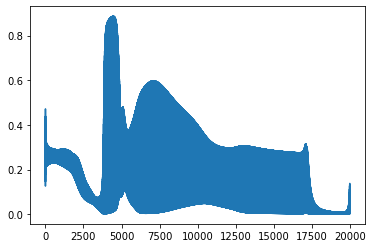

<ipython-input-3-ff08cbd10133>:12: RuntimeWarning: overflow encountered in exp
  y = 1.0/(1 + np.exp(-u))


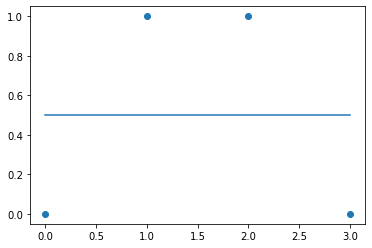

[[2 0]
 [0 2]]


In [22]:
show_resultats_multiperceptron(x, yd, w1, w2, loss)

* Les prédictions sont très bonnes

* La matrice de confusion affiche un résultat quasiment parfait

* En revanche la courbe d’erreur n’affiche pas une convergence nette vers 0

* ## Pour aller plus loin

#### J'ai essayé de faire en sorte de pouvoir modifier le nombre de neurones dans la zone cachée 
#### Mais le peu de valeur en entrée m'empêche d'avoir de bon résultat avec plus de 5 neurones
#### Donc j'ai essayé de l'utiliser pour le dataset p2_d2.txt, peut-être que les résultats seront meilleur que précedemment

In [91]:
# on charge les données
Data = np.loadtxt("Data/p2_d2.txt")
# on concatène les données avec un vecteur de 50 1 et avec un vecteur de 25 -1 et 25 1 pour les classes
Data_full = np.concatenate((np.array([[1]*50]),Data,np.array([[0]*25+[1]*25])))
# on mélange le dataset
Data_mix = Data_full[:, np.random.permutation(Data_full.shape[1])]
# on extrait l'entré et on la transpose pour suivre mon premier schéma
x = Data_mix[:-1].T
# on extrait les classes à prédire
yd = Data_mix[-1]

w1, w2, loss = multiperceptron_widrow(x, yd, nb_reurone, epoch, batch_size)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [03:14<00:00, 25.70it/s]


In [92]:
for i in range(len(x[0])):
    print(multiperceptron(x[i,:], w1, w2), yd[i])

0.00013514477057111334 0.0
0.9999756422170509 1.0
0.00010714434336360781 0.0


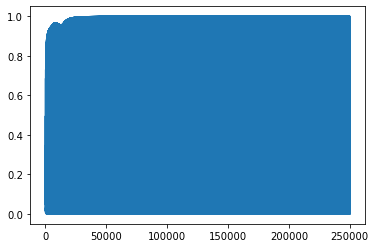

ValueError: shapes (1,3) and (50,1) not aligned: 3 (dim 1) != 50 (dim 0)

In [95]:
show_resultats_multiperceptron(x.T, yd, w1, w2, loss)

#### Mais sans succès, le taux d'erreur finit par stagner à 1
#### Et les prédictions sont mauvaises
#### Il est possible que j'ai oublié 1 ou 2 détails à modifier pour que cela marche sur ce dataset, mais après plusieurs heures de recherche je n'ai pas trouvé, c'est pourquoi je n'ai pas fais la suite de cette partie IV

# 2 Deep et Full-connected : discrimination d'une image

## On importe les librairies nécessaires

In [3]:
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from shutil import move
from glob import glob
from tqdm import tqdm
import os
import cv2

import tensorflow
from tensorflow import one_hot
import keras
from keras import *
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from tensorflow import losses
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


## 2.1 Approche basée Descripteurs (basée modèle)

## 2.1.1 Calcul des descripteurs

* ## Importer les differents tableaux de mesure et créer un vecteur de label indiquant la classe sous forme d'un chiffre de chaque image

In [4]:
def load_data(type: str):
    """
    Load Data
    qui à partir du fichiers Excel de données
    va créer un Dataframe avec les données du type spécifié et leur classe

    :param type: le nom de la feuille du fichier Excel WangSignatures
    :type type: str
    :return Wang: le DataFrame avec les données du type spécifié et leur classe
    :rtype Wang: pd.DataFrame
    """
    
    # on lit la feuille du fichier Excel des données WangSignatures
    Wang = pd.read_excel("Data/WangSignatures.xlsx", sheet_name=type, header=None)
    
    # on retire la mention jpg qui apparait à chaque ligne de la colonne des nom d'image pour pouvoir trier les données par ordre numérique
    Wang[0]=Wang[0].apply(lambda x: float(x.replace(".jpg","")))
    Wang = Wang.sort_values(by=0).reset_index(drop=True)
    
    # on leur affecte une classe selon leur ordre numérique
    Wang["y"] = [0]*100+[1]*100+[2]*100+[3]*100+[4]*100+[5]*100+[6]*100+[7]*100+[8]*100+[9]*100
    # on supprime la colonne avec le nom de l'image
    Wang = Wang.drop(0,axis=1)
    
    # on retourne le DataFrame
    return Wang

#### Attention à l’ordre des données qui était faussé par les mention « .jpg » dans la 1ère colonne.

## 2.1.2 Mise en place d'un système de discrimination basée structure Full-Connected

* ## Mettre en place un système de discrimination qui pour la présentation d'une image inconnue et de son vecteur de mesures associée propose une classe

In [5]:
def separate_data(df: pd.DataFrame):
    """
    Separate Data
    qui à partir du DataFrame de données
    va spliter les données en dataset d'entrainement et de test

    :param df: le DataFrame de données
    :type df: pd.DataFrame
    :return X_train: le dataset d'entrainement
    :rtype X_train: np.array
    :return X_test: le dataset de test
    :rtype X_test: np.array
    :return y_train: les classes du dataset d'entrainement au format (n,1)
    :rtype y_train: np.array
    :return y_test: les classes du dataset de test au format (n,1)
    :rtype y_test: np.array
    :return y_train2: les classes du dataset d'entrainement au format (n,10) où la colonne correspond à la classe
    :rtype y_train2: np.array
    :return y_test2: les classes du dataset d'entrainement au format (n,10) où la colonne correspond à la classe
    :rtype y_test2: np.array
    """
    
    # on conserve tous sauf la dernière colonne pour l'ensemble des données
    X = np.array(df.astype('float32').iloc[:,:-1])
    # on ne conserve que la derniere colonne pour l'ensemble des classe
    y = np.array(df.astype('float32').iloc[:,-1])
    
    # on utilise sklearn pour spliter les données en dataset d'entrainement et de test selon une proportion de 0.8 pour 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    # on modifie la structure des classes pour une matrice (n,10) où 10 est le nombre de classe pour que chaque colonne corresponde à la classe
    y_train2 = one_hot(y_train, depth=10)
    y_test2 = one_hot(y_test, depth=10)
    
    # on retourne les datasets et les classes selon leur 2 formats
    return X_train, X_test, y_train, y_test, y_train2, y_test2


def create_model(X_train: np.ndarray, y_train2: np.ndarray):
    """
    Create model
    qui à partir du dataset d'entrainement et des classes correspondantes
    va créer un model et l'entrainer selon plusieurs couches de convolution

    :param X_train: le dataset d'entrainement
    :type X_train: np.array
    :param y_train2: les classes du dataset d'entrainement au format (n,10) où la colonne correspond à la classe
    :type y_train2: np.array
    :return model: le model de prédiction
    :rtype model: keras.engine.sequential.Sequential
    """
        
    # on crée un model avec plusieurs couches
    model = Sequential()

    model.add(Dense(30, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(X_train, y_train2, epochs=50, batch_size=10, validation_split=0.1, verbose=0)
    
    # on retourne le modèle
    return model
  

#### Attention à la « shape » des données de classe (y)
#### Par exemple on modifie le y_train qui est égal à « 3 » par une liste de 9 « 0 » et 1 « 1 » en position 3. (Pareil pour y_test).


* ## Tester la procédure de classification avec les 5 types de mesures et differentes images inconnues

In [6]:
def show_resultats(model: Sequential, X_test: np.ndarray, y_test: np.ndarray, y_test2: np.ndarray):
    """
    Show Resultats
    qui à partir du model créé et entrainé
    va prédire les classes du dataset de test

    :param model: le model de prédiction
    :type model: keras.engine.sequential.Sequential
    :param X_test: le dataset de test
    :type X_test: np.array
    :param y_test: les classes du dataset de test au format (n,1)
    :type y_test: np.array
    :param y_test2: les classes du dataset d'entrainement au format (n,10) où la colonne correspond à la classe
    :type y_test2: np.array
    :return class_predict: la liste des classes prédites
    :rtype class_predict: list
    """
    
    # on affiche le score du model selon l'evaluation de son efficacité sur le dataset de test
    print("Score :", model.evaluate(X_test, y_test2, verbose=0))
    
    # on prédit les classes du dataset de test
    pred = model.predict(X_test, batch_size=10, verbose=0)
    
    # on crée une liste pour rassembler tous les resultats de prédiction
    class_predict = list()
    # pour chaque prédiction au format (n,10) où la colonne correspond à la classe
    for i in range(len(pred)):
        # on ne conserve que l'index de la valeur la plus élevée
        class_predict.append(argmax(pred[i]))

    # on crée un DataFrame avec les classes à prédire
    df = pd.DataFrame(y_test.copy(), columns=["classe"])
    # on y ajoute les classes prédites
    df["prediction"] = class_predict
    # on ne conserve que les lignes dont la prédiction a été mauvaise
    df.loc[df[df.prediction==df.classe].index, ("prediction","classe")] = np.nan

    # on met en place 2 graphiques en 1
    fig, ax = plt.subplots()
    x = range(len(df.classe))
    # avec les points des classes à prédire en vert
    ax.scatter(x, np.array(df.classe), color="green", label='Classe', s=15)
    # et les points des mauvaises préditions de ces classes à prédire en rouge
    ax.scatter(x, np.array(df.prediction), color="red", label='Prédiction', s=15, alpha=0.4)
    # on afffiche le graphique avec la légende en haut à gauche
    ax.legend(loc='upper left', frameon=True)
    plt.show()
    
    # on affiche la matrice de confusion correspondante
    seaborn.heatmap(confusion_matrix(y_test,class_predict), cmap="YlGnBu", annot=True)
    plt.show()
    
    # on retourne la liste des prédiction
    return class_predict


* ## Analyser les résultats (matrice de confusion, taux d'erreur)

WangSignaturesPHOG
Score : [1.7613438367843628, 0.4950000047683716]


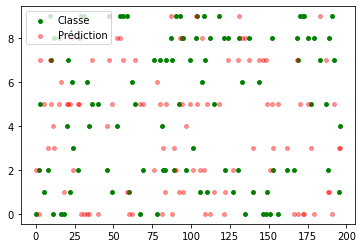

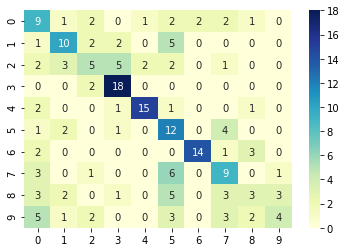

WangSignaturesJCD
Score : [0.2863759696483612, 0.9100000262260437]


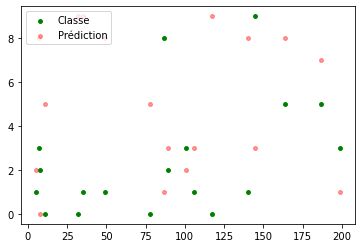

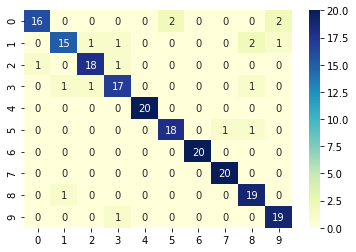

WangSignaturesCEDD
Score : [0.3429938554763794, 0.9200000166893005]


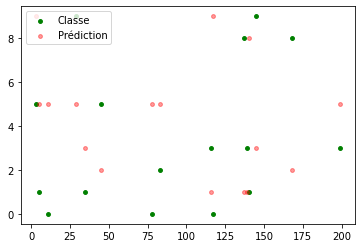

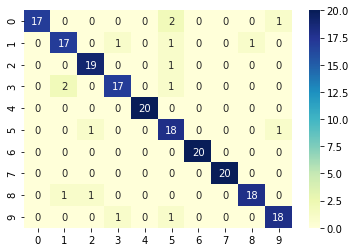

WangSignaturesFCTH
Score : [0.3990945816040039, 0.8550000190734863]


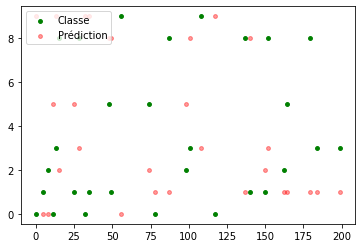

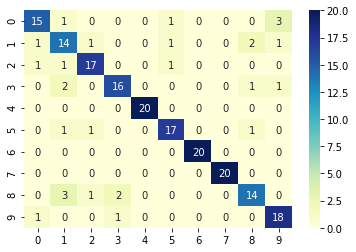

WangSignaturesFuzzyColorHistogr
Score : [1.6111088991165161, 0.33500000834465027]


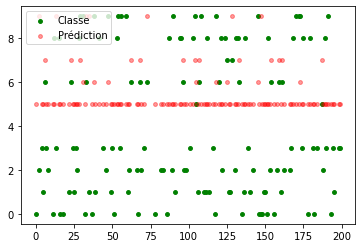

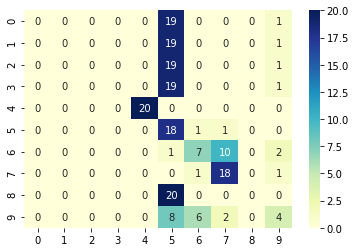

In [23]:
# pour chaque feuille du fichier Excel (chaque features)
for name in pd.ExcelFile("Data/WangSignatures.xlsx").sheet_names:
        
    # on affiche la feature
    print(name)
    
    # on charge les données
    Wang = load_data(name)

    # on charge les différents dataset et listes de classe
    X_train, X_test, y_train, y_test, y_train2, y_test2 = separate_data(Wang)

    # on crée et entraine le model
    model = create_model(X_train, y_train2)

    # on montre les resultats des prédictions du model sur le dataset de test
    prediction = show_resultats(model, X_test, y_test, y_test2)


#### Les points verts sont les classes biens prédites, et les rouges sont les mauvaises prédictions
#### On observe que les résultats sont plutôt bons sur 3 ensembles de données sur 5
#### Il est donc possible de faire mieux

* ## Comparer avec differents hyperparamètres.

In [18]:
def create_model(X_train: np.ndarray, y_train2: np.ndarray):
    """
    Create model
    qui à partir du dataset d'entrainement et des classes correspondantes
    va créer un model et l'entrainer selon plusieurs couches de convolution

    :param X_train: le dataset d'entrainement
    :type X_train: np.array
    :param y_train2: les classes du dataset d'entrainement au format (n,10) où la colonne correspond à la classe
    :type y_train2: np.array
    :return model: le model de prédiction
    :rtype model: keras.engine.sequential.Sequential
    """
        
    # on crée un model avec plusieurs couches
    model = Sequential()

    model.add(Dense(250, activation="relu"))
    model.add(Dense(120, activation="relu"))
    model.add(Dense(60, activation="relu"))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(X_train, y_train2, epochs=50, batch_size=10, validation_split=0.1, verbose=0)
    
    # on retourne le modèle
    return model

WangSignaturesPHOG
Score : [1.673134446144104, 0.5249999761581421]


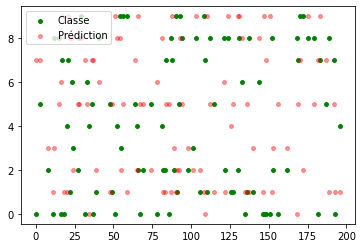

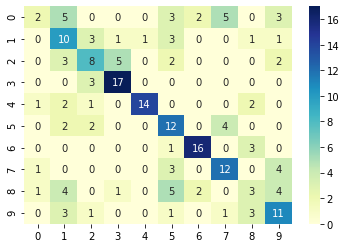

WangSignaturesJCD
Score : [0.2774902582168579, 0.9100000262260437]


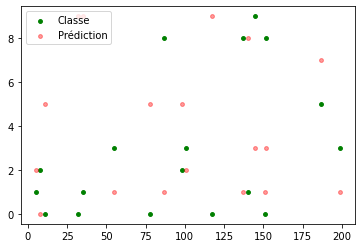

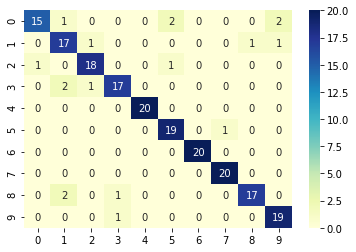

WangSignaturesCEDD
Score : [0.3505362570285797, 0.8949999809265137]


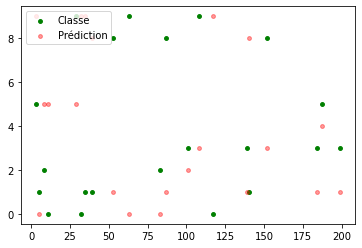

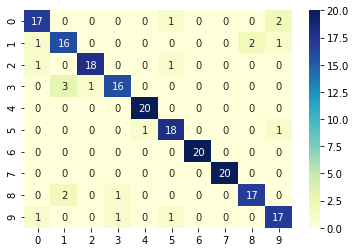

WangSignaturesFCTH
Score : [0.3875703513622284, 0.8849999904632568]


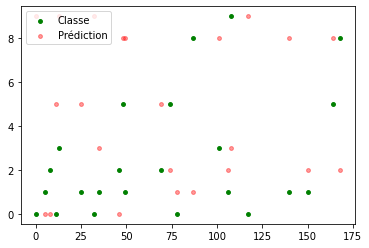

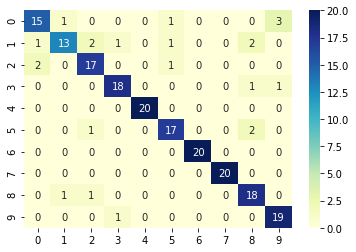

WangSignaturesFuzzyColorHistogr
Score : [1.619389295578003, 0.6299999952316284]


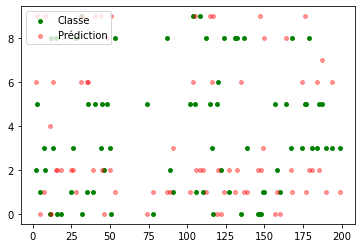

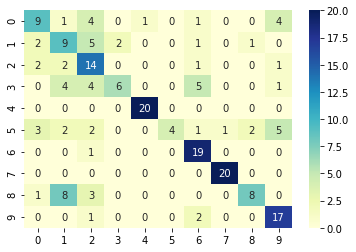

In [27]:
# pour chaque feuille du fichier Excel (chaque features)
for name in pd.ExcelFile("Data/WangSignatures.xlsx").sheet_names:
    
    # on affiche la feature
    print(name)
    
    # on charge les données
    Wang = load_data(name)

    # on charge les différents dataset et listes de classe
    X_train, X_test, y_train, y_test, y_train2, y_test2 = separate_data(Wang)

    # on crée et entraine le model
    model = create_model(X_train, y_train2)

    # on montre les resultats des prédictions du model sur le dataset de test
    prediction = show_resultats(model, X_test, y_test, y_test2)


#### En rajoutant des couches, les résultats sont meilleurs
#### Les résultats sont très bons pour les ensembles de données JCD/ CEDD/ FCTH
#### Les résultats des ensembles de données PHOG/ Fuzzy se sont améliorés
#### On peut encore faire mieux, mais sur l’ensemble des données c’est le meilleur résultat que j’ai pu obtenir

* ## En utilisant le cumul des mesures

In [26]:
Wang_final = pd.DataFrame()
# pour chaque feuille du fichier Excel (chaque features)
for name in tqdm(pd.ExcelFile("Data/WangSignatures.xlsx").sheet_names):

    # on charge les données
    Wang = load_data(name).drop(["y"], axis=1)
    
    Wang_final = pd.concat([Wang_final, Wang], axis=1)

    
# on leur affecte une classe selon leur ordre numérique
Wang_final["y"] = [0]*100+[1]*100+[2]*100+[3]*100+[4]*100+[5]*100+[6]*100+[7]*100+[8]*100+[9]*100

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.42s/it]


In [31]:
Wang_final

,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,y
0,10.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0,...,72.0,78.0,79.0,71.0,57.0,62.0,67.0,69.0,69.0,0
1,15.0,13.0,12.0,11.0,10.0,10.0,10.0,8.0,9.0,10.0,...,76.0,84.0,89.0,81.0,60.0,66.0,72.0,76.0,75.0,0
2,8.0,7.0,7.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,...,66.0,74.0,81.0,82.0,53.0,59.0,66.0,76.0,132.0,0
3,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,83.0,97.0,113.0,111.0,64.0,74.0,86.0,106.0,206.0,0
4,15.0,12.0,10.0,7.0,6.0,5.0,5.0,5.0,4.0,5.0,...,48.0,54.0,64.0,66.0,39.0,44.0,51.0,70.0,139.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15.0,12.0,11.0,10.0,10.0,10.0,9.0,8.0,8.0,8.0,...,18.0,25.0,37.0,42.0,14.0,18.0,24.0,42.0,255.0,9
996,15.0,13.0,14.0,13.0,13.0,13.0,14.0,13.0,13.0,14.0,...,84.0,105.0,136.0,140.0,65.0,78.0,96.0,124.0,153.0,9
997,15.0,14.0,14.0,10.0,7.0,7.0,6.0,5.0,5.0,4.0,...,56.0,74.0,103.0,114.0,43.0,55.0,75.0,133.0,255.0,9
998,15.0,12.0,11.0,9.0,8.0,7.0,7.0,7.0,6.0,6.0,...,44.0,48.0,55.0,52.0,36.0,39.0,43.0,48.0,48.0,9


#### On a bien 1000 lignes et le 885 colonnes pour :
* #### 255 pour PHOG
* #### 168 pour JCD
* #### 144 pour CEDD
* #### 192 pour FCTH
* #### 125 pour Fuzzy
* #### 1 pour la classe

In [29]:
def create_model(X_train: np.ndarray, y_train2: np.ndarray):
    """
    Create model
    qui à partir du dataset d'entrainement et des classes correspondantes
    va créer un model et l'entrainer selon plusieurs couches de convolution

    :param X_train: le dataset d'entrainement
    :type X_train: np.array
    :param y_train2: les classes du dataset d'entrainement au format (n,10) où la colonne correspond à la classe
    :type y_train2: np.array
    :return model: le model de prédiction
    :rtype model: keras.engine.sequential.Sequential
    """
        
    # on crée un model avec plusieurs couches
    model = Sequential()

    model.add(Dense(800, activation="relu"))
    model.add(Dense(750, activation="relu"))
    model.add(Dense(700, activation="relu"))
    model.add(Dense(600, activation="relu"))
    model.add(Dense(300, activation="relu"))
    model.add(Dense(200, activation="relu"))
    model.add(Dense(80, activation="relu"))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(X_train, y_train2, epochs=50, batch_size=10, validation_split=0.1, verbose=0)
    
    # on retourne le modèle
    return model

Score : [0.5389025211334229, 0.8550000190734863]


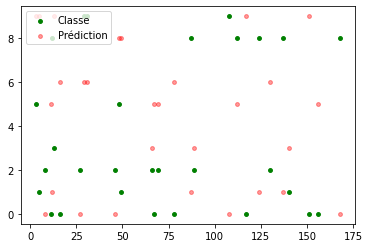

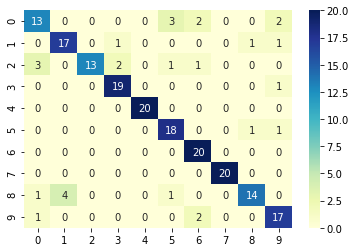

In [30]:
# on charge les différents dataset et listes de classe
X_train, X_test, y_train, y_test, y_train2, y_test2 = separate_data(Wang_final)

# on crée et entraine le model
model = create_model(X_train, y_train2)

# on montre les resultats des prédictions du model sur le dataset de test
prediction = show_resultats(model, X_test, y_test, y_test2)

#### Et on arrive à un très bon résultats : 86 % en accuracy, ce qui me satisfait parfaitement 

## 2.1.3 Approche "Deep" (basée Data)

#### Avant de commencer j'ai fait en sorte d'avoir un environnement de travail qui puisse faciliter mes test
#### A partir du dossier Wang, j'ai créé 2 sous dossier Train et Test composé de 9 sous sous dossiers pour les 9 classes d'image

In [62]:
def create_directory_and_class():
    """
    Create Directory And Classlass
    qui à partir du dossier Wang
    va créer 2 sous dossier de Train et Test composé de 9 sous sous dossiers pour les 9 classes d'image
    
    """
    # on essaye de créer le dossier Train
    try:
        os.mkdir(f"Wang/Train")
        print("Train created")
    except:
        print("Train already exists")
        
    # on essaye de créer le dossier Test
    try:
        os.mkdir(f"Wang/Test")
        print("Test created")
    except:
        print("Test already exists")

    # on essaye de créer les 10 sous dossiers pour les 10 classes
    for i in range(10):
        # on essaye pour le dossier Train
        try:
            os.mkdir(f"Wang/Train/{i}")
            print(f"Train {i} created")
        except:
            print(f"Train {i} already exists")
            
        # on essaye pour le dossier Test
        try:
            os.mkdir(f"Wang/Test/{i}")
            print(f"Test {i} created")
        except:
            print(f"Test {i} already exists")

    # pour chaque image du dossier Wang
    for img in tqdm(glob("Wang/*.jpg")):
        # on identifie son nom
        name = img.split("\\")[1]
        # on identifie son numero
        number = name[:-4]
        # on affecte à une classe selon le chiffre des centaine
        if int(number) < 100:
            move(img, f"Wang/Train/0/{name}")
        else:
            move(img, f"Wang/Train/{number[0]}/{name}")

  

In [63]:
# on prépare les dossiers, sous-dossiers et sous-sous-dossiers
create_directory_and_class()

0it [00:00, ?it/s]

Train already exists
Test already exists
Train 0 already exists
Test 0 already exists
Train 1 already exists
Test 1 already exists
Train 2 already exists
Test 2 already exists
Train 3 already exists
Test 3 already exists
Train 4 already exists
Test 4 already exists
Train 5 already exists
Test 5 already exists
Train 6 already exists
Test 6 already exists
Train 7 already exists
Test 7 already exists
Train 8 already exists
Test 8 already exists
Train 9 already exists
Test 9 already exists


* ## Mettre en place un système de classification qui a en données une image calcul les descripteurs par des couches de convolution.

#### Pour charger les images en 2 ensembles de données Train et Test, j’ai utilisé la fonction : tf.keras.utils.image_dataset_from_directory 
#### qui va :
* #### Cibler un dossier
* #### Lire les images pixel par pixel
* #### Les transformer en liste ou chaque pixel est une liste de 3 valeurs (RGB)
* #### Leur attribuer la classe qu'il convient
* #### Splitter les données en ensemble Train et Validation


In [33]:
def load_data():
    """
    Load Data
    qui à partir du sous dossier Train du dossier Wang
    va créer 2 dataset d'entrainement et de validation

    :return train_data: le dataset d'entrainement (80 pourcent du Train)
    :rtype train_data: tensorflow.python.data.ops.dataset_ops.BatchDataset
    :return val_data: le dataset de validation (20 pourcent du Train)
    :rtype val_data: tensorflow.python.data.ops.dataset_ops.BatchDataset
    :return y: les classes des données Train
    :rtype y: np.array
    """
    
    # on crée spécifie les classes des 1000 images 
    y = np.array([0]*100+[1]*100+[2]*100+[3]*100+[4]*100+[5]*100+[6]*100+[7]*100+[8]*100+[9]*100)

    # on va créer un dataset d'entrainement depuis le dossier Train
    train_data = image_dataset_from_directory(
        directory="Wang/Train",
        validation_split=0.2,
        subset="training",
        seed=42,
        batch_size=3)

    # on va créer un dataset de validation depuis le dossier Test
    val_data = image_dataset_from_directory(
        directory="Wang/Train",
        validation_split=0.2,
        subset="validation",
        seed=42,
        batch_size=3)

    # on affiche les classes avec leur derniere image en exemple
    fig = plt.figure(figsize=(10, 5))
    for img in glob("Wang/Train/*/*99.jpg"):
        # on recupère la classe
        classe = img.split("\\")[1]
        # on va lire l'image en RGB
        image = cv2.imread(img)
        b,g,r = cv2.split(image)
        rgb_image = cv2.merge([r,g,b])
        # on place l'image sur un subplot de 2 ligne et 5 colonnes
        fig.add_subplot(2, 5, int(classe)+1)
        
        # on affiche l'image et sa classe
        plt.imshow(rgb_image)
        plt.title(classe)
        plt.axis("off")

    # on retourne les classes et les dataset d'entrainement et de validation
    return train_data, val_data, y

Found 1000 files belonging to 10 classes.
Using 800 files for training.
Found 1000 files belonging to 10 classes.
Using 200 files for validation.


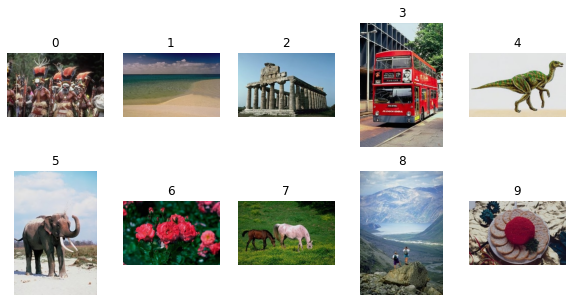

In [34]:
# on prépare les données
train_data, val_data, y = load_data()

#### Où chaque image est une liste de 256 listes de 3 valeurs (256 pixels divisés en 3 valeurs RGB)


In [70]:
# on affiche un exemple des données
for images, labels in train_data.take(1):
  print(len(images[0].numpy().astype("uint8")))    
  print(images[0].numpy().astype("uint8")[0])

256
[[ 15  16  44]
 [ 27  31  58]
 [ 34  40  64]
 [ 56  67  89]
 [ 56  68  90]
 [ 58  74  94]
 [ 65  83 103]
 [ 43  64  83]
 [ 34  56  77]
 [ 54  76  97]
 [ 58  76 100]
 [ 47  65  89]
 [ 56  70  97]
 [ 67  81 108]
 [ 78  88 118]
 [ 86  97 125]
 [ 58  70  97]
 [ 14  28  54]
 [  9  21  47]
 [ 24  35  61]
 [ 41  51  76]
 [ 39  49  74]
 [ 40  47  73]
 [ 32  39  65]
 [ 16  23  49]
 [ 12  19  45]
 [ 14  21  49]
 [ 11  18  46]
 [ 12  19  47]
 [  8  15  43]
 [ 16  23  52]
 [ 23  30  59]
 [  6  16  43]
 [  6  16  43]
 [ 10  17  45]
 [ 13  20  48]
 [ 13  18  47]
 [ 11  16  45]
 [ 13  17  46]
 [ 16  20  49]
 [ 13  17  46]
 [ 12  16  45]
 [ 12  16  45]
 [ 15  19  48]
 [ 17  21  48]
 [ 17  21  48]
 [ 16  22  48]
 [ 16  22  48]
 [ 16  21  50]
 [ 13  18  47]
 [ 13  18  47]
 [ 11  16  45]
 [ 14  19  48]
 [ 14  19  48]
 [ 14  19  48]
 [ 13  18  47]
 [ 13  18  47]
 [ 13  18  47]
 [ 16  21  50]
 [ 15  20  49]
 [ 11  16  45]
 [ 13  18  47]
 [ 18  23  52]
 [ 17  22  51]
 [ 14  19  49]
 [ 17  22  52]
 [ 23 

* ## Dans un premier temps tester des structures simples. Etudier l'infuence des paramètres, l'évolution de la fonction de cout.

In [71]:
def create_model(train_data, val_data):
    """
    Create Model
    qui à partir des 2 dataset d'entrainement
    va créer un model et l'entrainer selon plusieurs couches de convolution

    :param train_data: le dataset d'entrainement (80 pourcent du Train)
    :type train_data: tensorflow.python.data.ops.dataset_ops.BatchDataset
    :param val_data: le dataset de validation (20 pourcent du Train)
    :type val_data: tensorflow.python.data.ops.dataset_ops.BatchDataset
    :return model: le model de prédiction
    :rtype model: keras.engine.sequential.Sequential
    """
    
    # on crée un model avec plusieurs couches de convolution d'image 2D
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.Conv2D(128,4, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,4, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,4, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(16,4, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'],)

    tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs",
                                                        histogram_freq=1, 
                                                        write_images="logs",
                                                        embeddings_data=train_data)

    model.fit(train_data,
            validation_data=val_data,
            epochs=10,
            callbacks=[tensorboard_callback]
    )
    
    # on retourne le model entrainé
    return model

In [72]:
# on crée le modèle
model = create_model(train_data, val_data)

Epoch 1/10


C:\Users\sanqu\anaconda\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


267/267 [==============================] - 113s 417ms/step - loss: 1.9563 - accuracy: 0.2850 - val_loss: 1.4739 - val_accuracy: 0.5300
Epoch 2/10
267/267 [==============================] - 117s 436ms/step - loss: 1.3114 - accuracy: 0.5450 - val_loss: 1.4063 - val_accuracy: 0.5550
Epoch 3/10
267/267 [==============================] - 107s 399ms/step - loss: 0.9557 - accuracy: 0.6612 - val_loss: 1.1611 - val_accuracy: 0.6200
Epoch 4/10
267/267 [==============================] - 123s 460ms/step - loss: 0.6661 - accuracy: 0.7688 - val_loss: 1.3611 - val_accuracy: 0.6050
Epoch 5/10
267/267 [==============================] - 109s 406ms/step - loss: 0.4090 - accuracy: 0.8587 - val_loss: 1.6791 - val_accuracy: 0.5900
Epoch 6/10
267/267 [==============================] - 122s 456ms/step - loss: 0.3155 - accuracy: 0.9000 - val_loss: 2.2486 - val_accuracy: 0.5500
Epoch 7/10
267/267 [==============================] - 119s 446ms/step - loss: 0.2012 - accuracy: 0.9275 - val_loss: 2.1893 - val_accura

#### On remarque l'accuracy à mal commencer mais finit à un très haut niveau : 95%

* ## Comparer avec les résultats avec les méthodes basées caractéristiques.

In [73]:
def model_prediction_folder(model, folder_path):
    """
    Create Model
    qui à partir du model créé et entrainé
    va prédire les classes de toutes les images d'un dossier spécifié

    :param model: le model de prédiction
    :type model: keras.engine.sequential.Sequential
    :param folder_path: le dossier d'image à prédire entre "Train" et "Test"
    :type folder_path: str
    :return y: la liste des classes à prédire
    :rtype y: list
    :return class_predict: la liste des classes prédites
    :rtype class_predict: list
    """
    
    # on crée les list de classe à prédire et prédites
    y = list()
    class_predict = list()
    
    # pour chaque image du dossier spécifié
    for img in tqdm(glob(f"Wang/{folder_path}/*/*.j*g")):
        # on lit l'image
        image = cv2.imread(img)
        # si la lecture n'a pas été réalisée avec succès, on passe l'itération
        if type(image)!=np.ndarray:
            continue
        # sinon on traite l'image en RGB
        b,g,r = cv2.split(image)
        rgb_image = cv2.merge([r,g,b])
        # on la redimensionne
        img_to_predict = np.expand_dims(cv2.resize(rgb_image,(256,256)), axis=0) 
        
        # on prédit sa classe 
        pred = argmax(model.predict(img_to_predict))
        
        # on affecte aux listes la classe et sa prédiction
        y.append(int(img.split("\\")[1]))
        class_predict.append(pred)

    # on affiche le score de l'ensemble des prédictions
    print("Accuracy :", accuracy_score(y, class_predict))
    # on affiche la matrice de confusion
    print(seaborn.heatmap(confusion_matrix(y, class_predict), cmap="YlGnBu", annot=True))
    
    # on retourne les listes des classe et leurs prédictions
    return y, class_predict


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:01<00:00,  8.23it/s]


Accuracy : 0.888
AxesSubplot(0.125,0.125;0.62x0.755)


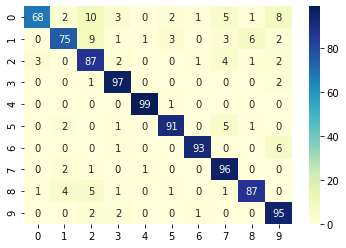

In [74]:
# on prédit le Train
y, class_predict = model_prediction_folder(model, "Train")


#### L’accuracy était déjà très bonne sur le dataset de Validation (95%), mais elle le reste sur le dataset de Test : 89%
#### Les prédictions sont vraiment très bonnes, la matrice de confusion en est la preuve.
#### La 5ème classe (n°4, les éléphants) se prédit quasiment parfaitement, et pour les pires prédiction, le modèle ne se trompe moins d'1 fois sur 3.
#### Les résultats sont donc très satisfaisants.

* ## Tester avec des structures plus complexes. La "Data augmentation" doit probablement être utilisée.

#### Pour cette partie j'ai utilisé une extension de Mozilla Firefox "Download All Image" 
#### Pour sauvegarder, via Google Images, environ 50 images de chaque classe 
#### Pour les mettre dans le sous-dossier Test du dossier Wang

100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [01:06<00:00,  7.75it/s]


Accuracy : 0.341796875
AxesSubplot(0.125,0.125;0.62x0.755)


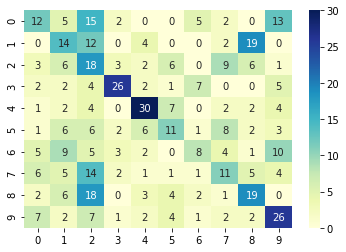

In [75]:
# on prédit le Test
y, class_predict = model_prediction_folder(model, "Test")


#### Malheureusement les prédictions ne sont pas bonnes car les images d'internet ne sont pas toutes ressemblantes à nos images d'entrainement, 
#### il faudrait prendre plus de temps pour bien sélectionner uniquement les images qui pourraient être reconnues
#### ou alors augmenter nos échantillons d'apprentissage

* ## Pour aller plus loin

#### J'ai également créé une fonction qui prédit 1 seul image si nécessaire

In [76]:
def model_prediction_file(model, path):
    """
    Create Model
    qui à partir du model créé et entrainé
    va prédire les classes de toutes les images d'un dossier spécifié

    :param model: le model de prédiction
    :type model: keras.engine.sequential.Sequential
    :param path: le chemin vers l'image à prédire
    :type path: str
    :return class_predict: la classe prédite
    :rtype class_predict: list
    """
    
    # on lit l'image
    image = cv2.imread(path)
    # on traite l'image en RGB
    b,g,r = cv2.split(image)
    rgb_image = cv2.merge([r,g,b])
    # on la redimensionne
    img_to_predict = np.expand_dims(cv2.resize(rgb_image,(256,256)), axis=0) 
    
    # on prédit sa classe 
    pred = argmax(model.predict(img_to_predict))
    # on affiche le resultat de la prédiction
    print("Classe :", pred)
    
    # on retourne la classe prédite
    return pred

In [77]:
# on prédit la classe d'une image
class_predict = model_prediction_file(model, "Wang/Test/test.jpeg")


Classe : 4
